In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
# read the data from the csv file
data = pd.read_csv("/Users/leonardogorelli/Downloads/AA_22_Team_14/Boston_Data_Clean.csv")

In [5]:
data.columns

Index(['Unnamed: 0', 'start_time', 'end_time', 'start_station_id',
       'end_station_id', 'start_station_name', 'end_station_name', 'bike_id',
       'user_type'],
      dtype='object')

# §1) Average Utilization Rate

In [6]:
# convert date columns to datetime
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

In [7]:
# empty list to store the result
utilization = []

In [8]:
# loop through each row of the dataset
for i, row in data.iterrows():
    difference = row['end_time'] - row['start_time']
    utilization.append(difference)

In [9]:
# convert the list in numeric value
numeric_utilization = []
for td in utilization:
    numeric_utilization.append(td.seconds)


In [10]:
# calculate the average utilization in seconds
average_utilization_sec = sum(numeric_utilization)/len(numeric_utilization)

# calculate the average utilization in minutes
average_utilization_min = average_utilization_sec/60

print(average_utilization_min )

16.475964606341456


### Average Utilization Rate per Month

In [11]:
# convert numeric values to datetime
data['start_time'] = pd.to_datetime(data['start_time'],unit='m')
data['end_time'] = pd.to_datetime(data['end_time'],unit='m')

In [12]:
# extract the month from the datetime objects
data['start_month'] = data['start_time'].dt.month

# calculate the utilization for each row
data['utilization'] = data['end_time'] - data['start_time']

# convert timedelta to seconds
data['utilization'] = data['utilization'].dt.total_seconds()

In [13]:
# group the data by the start month
monthly_utilization_sec = data.groupby('start_month')['utilization'].mean()

# calculate the average utilization in minutes per each month
monthly_utilization_min = monthly_utilization_sec/60

print(monthly_utilization_min)

start_month
1     13.120641
2     11.356841
3     15.849879
4     24.460077
5     20.214343
6     20.497892
7     21.714208
8     18.710743
9     17.715617
10    18.101139
11    14.151782
12    14.257984
Name: utilization, dtype: float64


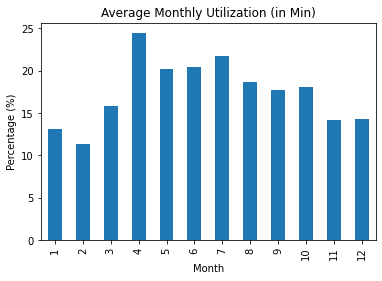

In [14]:
# create a visual representation of the "monthly_utilization_min" data
monthly_utilization_min.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.title("Average Monthly Utilization (in Min)")
plt.show()

The **Average Utilization Rate in minutes** in Boston in 2017 is 16.48 min.

The **Average Utilization Rate** change each Month. In particular, the **Highest Average Utilization** was recorded in April 2017 with 24.46 min, while the **Lowest Average Utilization** was recorded in February 2017 with only 11.36 min.

# §2) Shares of Customers and Subscribers 

In [15]:
# calculate the share of customers and subscribers
user_type_counts = data["user_type"].value_counts(normalize = True) * 100

print(user_type_counts)

Subscriber    84.089295
Customer      15.910705
Name: user_type, dtype: float64


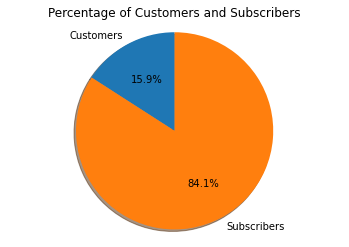

In [16]:
# pie chart
labels = ['Customers', 'Subscribers']
sizes = [user_type_counts['Customer'], user_type_counts['Subscriber']]

# plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Customers and Subscribers")
plt.show()

## Shares of Customers and Subscribers per Month

In [17]:
# convert start_time and end_time columns to datetime objects
data["start_time"] = pd.to_datetime(data["start_time"])
data["end_time"] = pd.to_datetime(data["end_time"])

In [18]:
# extract the month from the start_time and end_time columns
data["start_month"] = data["start_time"].dt.month
data["end_month"] = data["end_time"].dt.month

In [19]:
# group the data by month and user_type and calculate the percentage
monthly_user_type = data.groupby(["start_month", "user_type"]).size().groupby(level=0).apply(lambda x: 100 * x / x.sum())
monthly_user_type

start_month  user_type 
1            Customer       5.539329
             Subscriber    94.460671
2            Customer       6.137456
             Subscriber    93.862544
3            Customer       6.095415
             Subscriber    93.904585
4            Customer      22.569597
             Subscriber    77.430403
5            Customer      17.430059
             Subscriber    82.569941
6            Customer      19.179791
             Subscriber    80.820209
7            Customer      22.930849
             Subscriber    77.069151
8            Customer      17.988366
             Subscriber    82.011634
9            Customer      13.882842
             Subscriber    86.117158
10           Customer      12.970420
             Subscriber    87.029580
11           Customer       7.885679
             Subscriber    92.114321
12           Customer       3.595293
             Subscriber    96.404707
dtype: float64

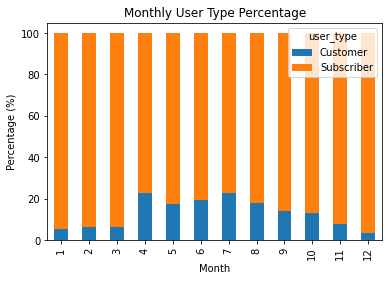

In [20]:
# create a visual representation of the "monthly_user_type" data
monthly_user_type.unstack().plot(kind='bar', stacked=True)
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.title("Monthly User Type Percentage")
plt.show()

The **Shares of Customers and Subscribers** in Boston in 2017 is 84.09% for Subscribers and only 15.91% for Customers.

However, the Shares change each month. In particular, the **Highest Percentage of Subscribers** was recorded in December (96.40%), while the **Lowest Percentage of Subscribers** was recorded in July (77.07%).

On the other hand, the **Highest Percentage of Customers** was recorded in July (22.93%), while the **Lowest Percentage of Subscribers** was recorded in December (3.60%).

# §3) Ratio of Customers to Subscribers

In [21]:
# calculate the ratio of customers to subscribers
user_type_counts = data["user_type"].value_counts()

# divide the count of customers by count of subscribers
overall_ratio = user_type_counts['Customer']/user_type_counts['Subscriber']

print(overall_ratio)

0.1892120148923401


## Ratio of Customers to Subscribers per Month

In [22]:
# calculate the monthly ratio of customers to subscribers
monthly_ratio = monthly_user_type.loc[:,'Customer'] / monthly_user_type.loc[:,'Subscriber']
monthly_ratio

start_month
1     0.058642
2     0.065388
3     0.064911
4     0.291482
5     0.211094
6     0.237314
7     0.297536
8     0.219339
9     0.161209
10    0.149035
11    0.085608
12    0.037294
dtype: float64

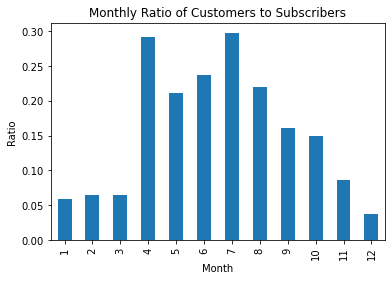

In [23]:
# create a visual representation of the "monthly_ratio" data
monthly_ratio.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Ratio")
plt.title("Monthly Ratio of Customers to Subscribers")
plt.show()

The **Overal Ratio of Customers to Subscribers** in Boston in 2017 is 0.1892.

However, the Ratio change each month. In particular, the **Highest Ratio of Customers to Subscribers** was recorded in July (0.2975), while the **Lowest Ratio of Customers to Subscribers** was recorded in December (0.0373).